<a href="https://colab.research.google.com/github/cdixson-ds/unit2-build/blob/master/Unit2_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports:

In [1]:
!pip install category_encoders==2.*

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
df = pd.read_csv('https://drive.google.com/u/0/uc?id=1VRohT0ss61yxRNLJnPuR9fG98LHjESqh&export=download')

In [5]:
df.shape

(40000, 2)

Data Cleaning and Exploration:

In [6]:
#Distribution, 50% majority class baseline

df['label'].value_counts(True)

0    0.500475
1    0.499525
Name: label, dtype: float64

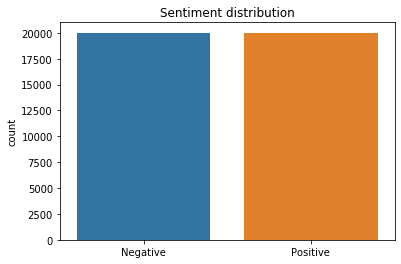

In [7]:
#Distribution bar plot

ax = sns.countplot(x = 'label', data=df)
ax.set_title("Sentiment distribution")
ax.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("")
plt.show()

In [8]:
df.groupby('label').describe()

text                                                               
       count unique                                                top freq
label                                                                      
0      20019  19815  This show comes up with interesting locations ...    3
1      19981  19908  Hilarious, clean, light-hearted, and quote-wor...    4

In [9]:
#Create a length column

df['length'] = df['text'].apply(len)
df.head(100)

,text,label,length
0,I grew up (b. 1965) watching and loving the Th...,0,874
1,"When I put this movie in my DVD player, and sa...",0,1811
2,Why do people who do not know what a particula...,0,983
3,Even though I have great interest in Biblical ...,0,351
4,Im a die hard Dads Army fan and nothing will e...,1,983
...,...,...,...
95,...I saw this movie when it first came out in ...,1,671
96,"Released in December of 1957, Sayonara went on...",1,925
97,"War, Inc. - Corporations take over war in the ...",0,2012
98,What is your freaking problem? Do you have not...,1,774


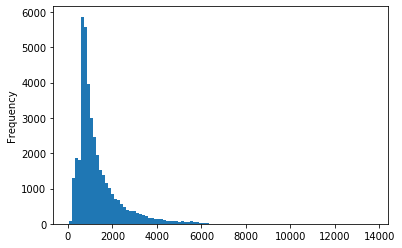

In [10]:
#Length histogram

df['length'].plot.hist(bins = 100)
plt.show()

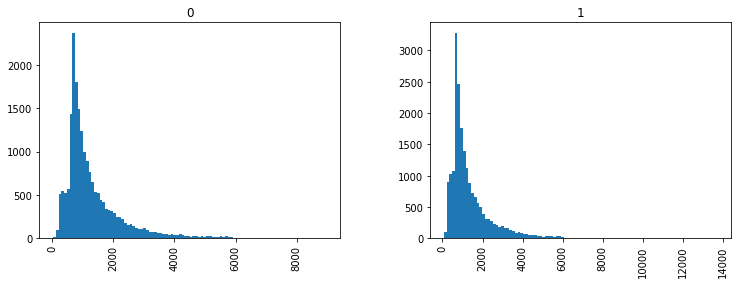

In [11]:
#length distribution by classes

df.hist(column='length', by='label', bins=100, figsize=(12,4))
plt.show()

In [0]:
def clean_text(X):
  #remove HTML tags
  X = BeautifulSoup(X).get_text()

  #remove all non letters from text
  letters_only = re.sub("[^a-zA-Z]", " ", X) 

  #lower case, split words
  words = letters_only.lower().split()

  #stopwords variable
  stops = set(stopwords.words('english'))

  #Remove stop words and return
  return [w for w in words if not w in stops]

In [13]:
#clean dataframe
#create word count feature

df['clean_review'] = df['text'].apply(clean_text)
df['word_count'] = df['clean_review'].apply(len)
df.head()

,text,label,length,clean_review,word_count
0,I grew up (b. 1965) watching and loving the Th...,0,874,"[grew, b, watching, loving, thunderbirds, mate...",85
1,"When I put this movie in my DVD player, and sa...",0,1811,"[put, movie, dvd, player, sat, coke, chips, ex...",159
2,Why do people who do not know what a particula...,0,983,"[people, know, particular, time, past, like, f...",95
3,Even though I have great interest in Biblical ...,0,351,"[even, though, great, interest, biblical, movi...",33
4,Im a die hard Dads Army fan and nothing will e...,1,983,"[im, die, hard, dads, army, fan, nothing, ever...",100


In [0]:
# Word CLoud

#d_cloud = WordCloud(width = 1000, height = 500, background_color = 'black').generate(
#                        ''.join(df['clean_review']))

#plt.figure(figsize = (16,10))
#plt.imshow(word_cloud)
#plt.axis('off')
#plt.show()

In [0]:
#tokenize data

bow_transform = CountVectorizer(analyzer=clean_text).fit(df['text'])

In [16]:
print(bow_transform)

CountVectorizer(analyzer=<function clean_text at 0x7f3132883268>, binary=False,
                decode_error='strict', dtype=<class 'numpy.int64'>,
                encoding='utf-8', input='content', lowercase=True, max_df=1.0,
                max_features=None, min_df=1, ngram_range=(1, 1),
                preprocessor=None, stop_words=None, strip_accents=None,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None,
                vocabulary=None)


In [0]:
review_bow = bow_transform.transform(df['text'])

In [18]:
print(review_bow)

  (0, 408)	1
  (0, 1726)	1
  (0, 2749)	1
  (0, 4146)	1
  (0, 5361)	1
  (0, 6796)	1
  (0, 8137)	1
  (0, 13077)	1
  (0, 13130)	1
  (0, 13255)	1
  (0, 13885)	1
  (0, 13900)	1
  (0, 15915)	1
  (0, 16003)	1
  (0, 17531)	1
  (0, 17605)	1
  (0, 17983)	1
  (0, 21867)	1
  (0, 21937)	1
  (0, 24426)	1
  (0, 26450)	1
  (0, 29111)	1
  (0, 30417)	1
  (0, 30672)	1
  (0, 32524)	1
  :	:
  (39999, 47357)	1
  (39999, 47373)	1
  (39999, 48848)	1
  (39999, 49068)	1
  (39999, 51748)	1
  (39999, 52351)	1
  (39999, 54887)	1
  (39999, 56029)	1
  (39999, 65811)	1
  (39999, 67555)	1
  (39999, 68571)	1
  (39999, 70649)	1
  (39999, 70864)	1
  (39999, 74896)	1
  (39999, 75820)	1
  (39999, 76001)	1
  (39999, 76858)	1
  (39999, 80690)	1
  (39999, 81674)	1
  (39999, 83518)	1
  (39999, 83796)	1
  (39999, 84324)	1
  (39999, 88945)	1
  (39999, 90403)	1
  (39999, 90706)	1


In [19]:
print(bow_transform.get_feature_names()[471])  #word at index accomplishment
print(bow_transform.get_feature_names()[26836])  #evanescent

accomplishment
evanescent


In [0]:
#Term frequency: how frequently a term is used / length
#IDF: Inverse Document Frequency, measures importance of the term
#rare words have more importance, are scaled up using:
#  IDF(t) = log_e(Total # of reviews/ # of reviews with term t in it)

tfidf_transformer = TfidfTransformer().fit(review_bow)
tfidf1 = tfidf_transformer.transform(review_bow)  #transform bow

In [22]:
#Split into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.22, random_state=42)

#length of train, test, and df
len(X_train), len(X_test), len(X_train) + len(X_test)

(31200, 8800, 40000)

In [23]:
X_train.head()

14748    *Contains some spoilers* This movie is cheesy ...
26843    My wife and I thought that with this cast and ...
20647    Traffik is an excellent miniseries dealing wit...
1572     Director Samuel Fuller concocts a brilliant vi...
6657     I would not hesitate to put this adaptation of...
Name: text, dtype: object

Predictive Models:

In [0]:
#Predicting & Stats Function
def pred(predicted,compare):
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    
    ##check accuracy of model
    print("Classification Report:")
    print('Accuracy : ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('False Negative Rate : ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate : ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))

In [25]:
#Logistic Regression Model
#Model used for the app

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from bs4 import BeautifulSoup

pipeline = Pipeline([
                     ('bow', CountVectorizer(analyzer='word')),  # strings to token integer counts
                     ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                     ('classifier', LogisticRegression(random_state=101)),  # train on TF-IDF vectors
])

pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [26]:
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

Classification Report:
Accuracy :  93.26

False Negative Rate :  6.02

False Postive Rate :  7.46

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     15642
           1       0.93      0.94      0.93     15558

    accuracy                           0.93     31200
   macro avg       0.93      0.93      0.93     31200
weighted avg       0.93      0.93      0.93     31200



In [27]:
#Test set results
predictions = pipeline.predict(X_test)
pred(predictions,y_test)

Classification Report:
Accuracy :  89.43

False Negative Rate :  9.74

False Postive Rate :  11.4

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      4377
           1       0.89      0.90      0.90      4423

    accuracy                           0.89      8800
   macro avg       0.89      0.89      0.89      8800
weighted avg       0.89      0.89      0.89      8800



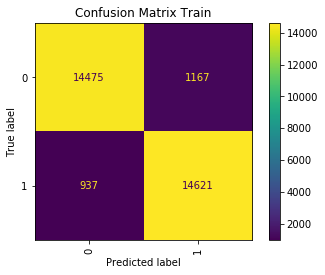

In [28]:
#Plot Confusion Matrix for train

from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion Matrix Train", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(pipeline, X_train, y_train, values_format='d', 
                                 xticks_rotation='vertical')
    disp.ax_.set_title(title)

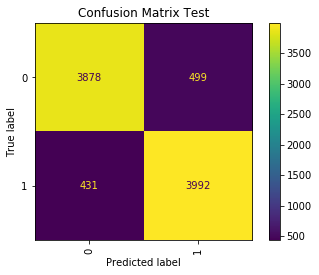

In [29]:
#Plot Confusion Matrix for test

titles_options = [("Confusion Matrix Test", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(pipeline, X_test, y_test, values_format='d', 
                                 xticks_rotation='vertical')
    disp.ax_.set_title(title)

In [30]:
#Pickle the pipeline

from joblib import dump
dump(pipeline, 'pipeline.joblib', compress=True)

['pipeline.joblib']

In [31]:
!ls -lh pipeline.joblib

-rw-r--r-- 1 root root 2.6M Mar  6 20:15 pipeline.joblib


In [0]:
#Download the pickle

from google.colab import files
#files.download('pipeline.joblib')

In [0]:
#Plot ROC curve

#Predicted probabilities for the positive class
y_pred_proba = pipeline.predict_proba(X_test)[:,1]

In [0]:
# "The ROC curve is created by plotting the true positive rate (TPR) 
# against the false positive rate (FPR) 
# at various threshold settings."

# Use scikit-learn to calculate TPR & FPR at various thresholds
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [35]:
#False Positives and true positives

pd.DataFrame({
    'False Positive Rate': fpr, 
    'True Positive Rate': tpr, 
    'Threshold': thresholds
})

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.999118
1,0.000000,0.000226,0.999118
2,0.000000,0.050418,0.976292
3,0.000000,0.050870,0.976287
4,0.000000,0.051549,0.976018
...,...,...,...
1375,0.972355,0.999548,0.004640
1376,0.972355,0.999774,0.004588
1377,0.995202,0.999774,0.001041
1378,0.995202,1.000000,0.000981


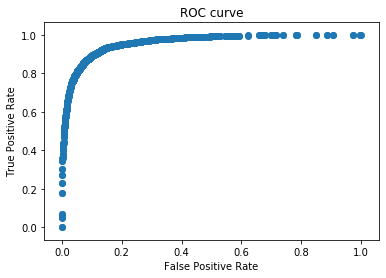

In [36]:
# This is the "Receiver Operating Characteristic" curve

plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [37]:
# Use scikit-learn to calculate the area under the curve.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.9603496397189779

More Models:

In [0]:
#XGBoost

import category_encoders as ce
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', XGBClassifier(n_estimators = 500)),  # train on TF-IDF vectors 
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

In [0]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', DecisionTreeClassifier(max_depth=40, min_samples_leaf=5, random_state=42)),  # train on TF-IDF vectors 
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

In [0]:
model = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier(max_depth=40, min_samples_leaf=5, random_state=42)),  # train on TF-IDF vectors 
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

Prediction Function for App:

In [0]:
#Need a prediction function

def predict(text): 
    #if clicked:
        text = [text]
        y_pred = pipeline.predict(text)
        if y_pred[0] == 0:
            y_pred = 'negative'
        else:
            y_pred = 'positive'
        output = [f'This review is {y_pred}.']
        return output

In [0]:
#Negative 

predict('This movie is the worst. I hated it.')

In [0]:
#Positive

predict('I love this movie so much I am going to watch it every day for the rest of my life')

Visualization:

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word',
                             ngram_range=(1,1),
                             binary=True, #binary instead of count
                             max_df=0.9, #remove words that are too frequent
                             min_df=10, #remove words that are too rare
                             max_features = None)

In [0]:
X_vect_train = vectorizer.fit_transform(X_train)

In [0]:
#Another logistic regression model

logreg = LogisticRegression()

In [0]:
logreg.fit(X_vect_train, y_train)

In [0]:
#Performance
#need roc_auc_score visualization

from sklearn.metrics import accuracy_score, roc_auc_score

p_valid = logreg.predict_proba(vectorizer.transform(X_test))

In [0]:
accuracy_score(y_test, p_valid.argmax(axis=1))

In [0]:
vectorizer.vocabulary_['good']

In [0]:
vectorizer.vocabulary_['truly']

In [0]:
#Store in a dataframe

coefs = pd.DataFrame(columns=['word'])
for word, ind in vectorizer.vocabulary_.items():
    coefs.loc[ind, 'word'] = word
coefs.sort_index(inplace=True)

In [0]:
coefs.head(10)

In [0]:
#coefficients stored in an array

logreg.coef_

In [0]:
#word order corresponds to coefficient order

coefs['coefs'] = logreg.coef_[0]

In [0]:
#Get most relevant words

most_relevant_words = coefs.iloc[np.argsort(coefs.coefs.abs())].tail(20)

In [0]:
#Check least relevant words

least_relevant_words = coefs.iloc[np.argsort(coefs.coefs.abs())].head(20)

In [0]:
most_relevant_words.sort_values('coefs', inplace=True)

In [0]:
def plot_coefs(words, impacts):
    plt.figure(figsize=(12,10))
    pos_ind = (impacts > 0)
    position = np.arange(len(words))
    plt.barh(y=position[pos_ind], width=impacts[pos_ind], color='green')
    plt.barh(y=position[~pos_ind], width=impacts[~pos_ind], color='red')
    plt.yticks(position + 0.4 ,words)
    plt.title("Words Commonly Found in Positive and Negative Movie Reviews", fontsize=16, fontweight="bold")
    plt.show()

In [0]:
print(most_relevant_words.word.values)

In [0]:
print(most_relevant_words.coefs.values)

In [0]:
plot_coefs(most_relevant_words.word.values, most_relevant_words.coefs.values)